30-Aug-24 17:44:22: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/fields/l2/mag_rtn/2022/
30-Aug-24 17:44:23: File is current: psp_data/fields/l2/mag_rtn/2022/psp_fld_l2_mag_rtn_2022101000_v02.cdf
30-Aug-24 17:44:23: File is current: psp_data/fields/l2/mag_rtn/2022/psp_fld_l2_mag_rtn_2022101006_v02.cdf
30-Aug-24 17:44:24: File is current: psp_data/fields/l2/mag_rtn/2022/psp_fld_l2_mag_rtn_2022101012_v02.cdf
30-Aug-24 17:44:25: File is current: psp_data/fields/l2/mag_rtn/2022/psp_fld_l2_mag_rtn_2022101018_v02.cdf
30-Aug-24 17:44:25: File is current: psp_data/fields/l2/mag_rtn/2022/psp_fld_l2_mag_rtn_2022101100_v02.cdf
30-Aug-24 17:44:26: File is current: psp_data/fields/l2/mag_rtn/2022/psp_fld_l2_mag_rtn_2022101106_v02.cdf
30-Aug-24 17:44:27: File is current: psp_data/fields/l2/mag_rtn/2022/psp_fld_l2_mag_rtn_2022101112_v02.cdf
30-Aug-24 17:44:27: File is current: psp_data/fields/l2/mag_rtn/2022/psp_fld_l2_mag_rtn_2022101118_v02.cdf
30-Aug-24 17:44:27: Downloading re

Using LEVEL=L3


30-Aug-24 17:44:28: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2022/psp_swp_spi_sf00_l3_mom_20221010_v04.cdf
30-Aug-24 17:44:29: File is current: psp_data/sweap/spi/l3/spi_sf00_l3_mom/2022/psp_swp_spi_sf00_l3_mom_20221011_v04.cdf
30-Aug-24 17:44:29: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/psp/sweap/spc/l3/l3i/2022/


Using LEVEL=L3


30-Aug-24 17:44:30: File is current: psp_data/sweap/spc/l3/l3i/2022/psp_swp_spc_l3i_20221010_v02.cdf
30-Aug-24 17:44:31: File is current: psp_data/sweap/spc/l3/l3i/2022/psp_swp_spc_l3i_20221011_v02.cdf


['C:/Users/14milosi/CIRESA/psp_data/fields/l2\\mag_rtn\\2022\\psp_fld_l2_mag_rtn_2022101000_v02.cdf', 'C:/Users/14milosi/CIRESA/psp_data/fields/l2\\mag_rtn\\2022\\psp_fld_l2_mag_rtn_2022101006_v02.cdf', 'C:/Users/14milosi/CIRESA/psp_data/fields/l2\\mag_rtn\\2022\\psp_fld_l2_mag_rtn_2022101012_v02.cdf', 'C:/Users/14milosi/CIRESA/psp_data/fields/l2\\mag_rtn\\2022\\psp_fld_l2_mag_rtn_2022101018_v02.cdf', 'C:/Users/14milosi/CIRESA/psp_data/fields/l2\\mag_rtn\\2022\\psp_fld_l2_mag_rtn_2022101100_v02.cdf', 'C:/Users/14milosi/CIRESA/psp_data/fields/l2\\mag_rtn\\2022\\psp_fld_l2_mag_rtn_2022101106_v02.cdf', 'C:/Users/14milosi/CIRESA/psp_data/fields/l2\\mag_rtn\\2022\\psp_fld_l2_mag_rtn_2022101112_v02.cdf', 'C:/Users/14milosi/CIRESA/psp_data/fields/l2\\mag_rtn\\2022\\psp_fld_l2_mag_rtn_2022101118_v02.cdf'] ['C:/Users/14milosi/CIRESA/psp_data/sweap/spc/l3\\l3i\\2022\\psp_swp_spc_l3i_20221010_v02.cdf', 'C:/Users/14milosi/CIRESA/psp_data/sweap/spc/l3\\l3i\\2022\\psp_swp_spc_l3i_20221011_v02.cdf'] 

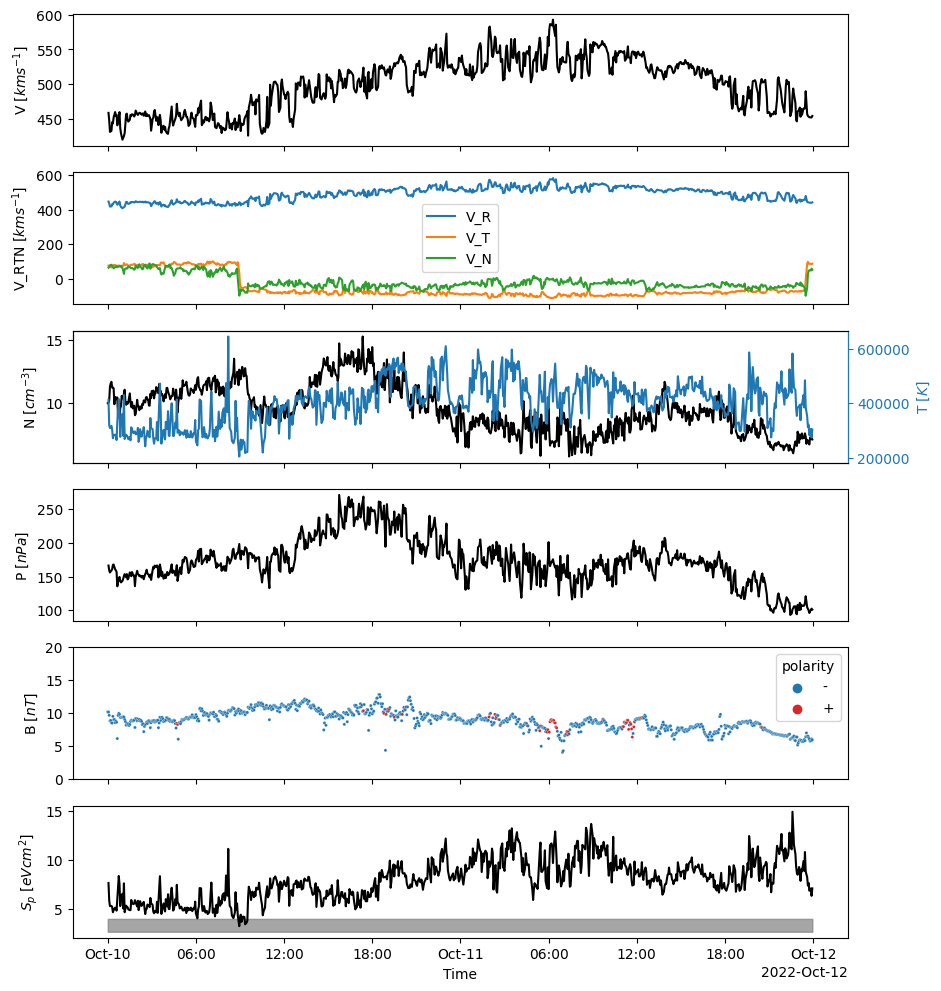

In [1]:
from CIRESA import stereo_a, omni, solo, psp, filefinder

psp.download_psp(['2022-10-10', '2022-10-12'])
psp_df = psp.reduce_psp(['2022-10-10', '2022-10-12'], '0.05H')
psp.plot_psp(psp_df)